In [1]:
## Imports
import word_tokenizer
import pandas as pd
from gensim import models

## Politician-embeddings

### Loading Climate related Meetings

In [5]:
df = pd.read_pickle("../../climate_classifier/scored_data/ft_meetings_total_2012-2022_2.1.pkl")
df_c = df[df["y_pred"]=="climate"].reset_index(drop=True)
df_c

,speaker,politician,party,text,date,y_pred
0,Transportministeren Henrik Dam Kristensen,Henrik Dam Kristensen,(S),"Jeg synes, det er lidt ærgerligt, at hr. Lars ...",2012-10-03,climate
1,Lars Christian Lilleholt (V),Lars Christian Lilleholt,(V),Det får jo ganske alvorlige konsekvenser både ...,2012-10-03,climate
2,Ellen Trane Nørby (V),Ellen Trane Nørby,(V),"Jeg tror i hvert fald, at det ofte er sådan fo...",2012-10-04,climate
3,Magnus Heunicke (S),Magnus Heunicke,(S),"Altså, det er jo svært at blive enig, jeg tror...",2012-10-04,climate
4,Kisser Franciska Lehnert (LA),Kisser Franciska Lehnert,(LA),Tak. Nu kalder Enhedslisten sig jo for et arbe...,2012-10-04,climate
...,...,...,...,...,...,...
7420,Susanne Zimmer (FG),Susanne Zimmer,(FG),"Tak for det, formand. Tak til SF og hr. Carl V...",2022-03-03,climate
7421,Susanne Zimmer (FG),Susanne Zimmer,(FG),"Det glæder mig, men samtidig med det her er vi...",2022-03-03,climate
7422,Susanne Zimmer (FG),Susanne Zimmer,(FG),"Ja, ved frokostmåltiderne, ikke ved aftensmålt...",2022-03-03,climate
7423,Carl Valentin (SF),Carl Valentin,(SF),"Tak. Jeg er meget enig med ministeren i, at vi...",2022-03-03,climate


In [6]:
## Add a comma + space in end of all texts
df_c["text"] = df_c["text"]+"<> "
df_c["politician"] = df_c["politician"].str.strip()
pol_c = df_c.groupby(['politician'])['text'].sum()
pol_c

politician
Aaja Chemnitz Larsen     Altså, den er jo inspireret lidt af tanken med...
Aki-Matilda Høegh-Dam    Tak for ordet. I rigsfællesskabet går vi en sp...
Aleqa Hammond            Arktis er jo så meget mere end bare forsvar, b...
Alex Ahrendtsen          Tak for det. Jeg må indrømme, at det er et sne...
Alex Vanopslagh          Tak til ordføreren for en passioneret tale om ...
                                               ...                        
Victoria Velasquez       Tak for spørgsmålet. Jeg synes egentlig ikke, ...
Villum Christensen       Tak for det. Liberal Alliance synes, at intent...
Zenia Stampe             Tak for det. Jeg kunne forstå, at SF's formand...
Özlem Sara Cekic         Tak, og tak til forespørgerne fra Dansk Folkep...
Øjvind Vilsholm          Tak til SF for at fremsætte et rigtig godt for...
Name: text, Length: 314, dtype: object

In [7]:
df_pol_c = pd.DataFrame(pol_c)
df_pol_c["politician"] = df_pol_c.index
df_pol_c = df_pol_c[["politician", "text"]].reset_index(drop=True)
print(len(df_pol_c.loc[4]["text"]))
df_pol_c

34753


,politician,text
0,Aaja Chemnitz Larsen,"Altså, den er jo inspireret lidt af tanken med..."
1,Aki-Matilda Høegh-Dam,Tak for ordet. I rigsfællesskabet går vi en sp...
2,Aleqa Hammond,"Arktis er jo så meget mere end bare forsvar, b..."
3,Alex Ahrendtsen,"Tak for det. Jeg må indrømme, at det er et sne..."
4,Alex Vanopslagh,Tak til ordføreren for en passioneret tale om ...
...,...,...
309,Victoria Velasquez,"Tak for spørgsmålet. Jeg synes egentlig ikke, ..."
310,Villum Christensen,"Tak for det. Liberal Alliance synes, at intent..."
311,Zenia Stampe,"Tak for det. Jeg kunne forstå, at SF's formand..."
312,Özlem Sara Cekic,"Tak, og tak til forespørgerne fra Dansk Folkep..."


### Vectorize Texts

In [10]:
MODEL_FILE = '../../../../Models/word2vec/dsl_skipgram_2020_m5_f500_epoch2_w5.models/dsl_skipgram_2020_m5_f500_epoch2_w5.model'
model = models.Word2Vec.load(MODEL_FILE)

        ## Takes 2 min to load on Jonathan PC 2

## Used for vectorizing the description text (filtered)
words = set(model.wv.index_to_key)

In [11]:
## Remove stopwords and create lists containing words
df_pol_c['text_clean'] = df_pol_c['text'].apply(lambda x: word_tokenizer.tokenize(x))
df_pol_c.head(3)

,politician,text,text_clean
0,Aaja Chemnitz Larsen,"Altså, den er jo inspireret lidt af tanken med...","[altså, inspirere, lidt, tank, klimafond, hand..."
1,Aki-Matilda Høegh-Dam,Tak for ordet. I rigsfællesskabet går vi en sp...,"[tak, ord, rigsfællesskab, går, spændende, tid..."
2,Aleqa Hammond,"Arktis er jo så meget mere end bare forsvar, b...","[arktis, se, mere, bare, forsvare, beredskab, ..."


In [12]:
import numpy as np
pol_vect = np.array([np.array([model.wv[i] for i in ls if i in words])
                         for ls in df_pol_c["text_clean"]])
                         ## Takes 32 sec on Jonathan PC 2

C:\Users\COBOD\AppData\Local\Temp\ipykernel_2948\2123071034.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  pol_vect = np.array([np.array([model.wv[i] for i in ls if i in words])


In [13]:
pol_vec_avg = []
for v in pol_vect:
    if v.size:
        pol_vec_avg.append(v.mean(axis=0))
    else:
        pol_vec_avg.append(np.zeros(100, dtype=float))

        ## Takes 0.4 sec Jonathan PC 2

In [14]:
df_pol_c["vec"] = pol_vec_avg
df_pol_c.head(1)

,politician,text,text_clean,vec
0,Aaja Chemnitz Larsen,"Altså, den er jo inspireret lidt af tanken med...","[altså, inspirere, lidt, tank, klimafond, hand...","[-0.099937215, 0.020752087, 0.070243455, -0.15..."


### Clustering using T-SNES OR PCA to reduce to 2 dimensions

In [22]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
X = df_pol_c
X.head(1)



,politician,text,text_clean,vec
0,Aaja Chemnitz Larsen,"Altså, den er jo inspireret lidt af tanken med...","[altså, inspirere, lidt, tank, klimafond, hand...","[-0.099937215, 0.020752087, 0.070243455, -0.15..."


In [130]:
## Get politicians in the chosen parties
parties_selection = ["(S)", "(V)", "(SF)", "(KF)", "(DF)", "(EL)"
                    ,"(RV)", "(ALT)", "(LA)"]
print(len(df))
df_selection = df[df["party"].isin(parties_selection)]
print(len(df_selection))
df_selection.head(2)

215904
205650


,speaker,politician,party,text,date,y_pred
0,Transportministeren Henrik Dam Kristensen,Henrik Dam Kristensen,(S),"Jeg synes, det er lidt ærgerligt, at hr. Lars ...",2012-10-03,climate
1,Lars Christian Lilleholt (V),Lars Christian Lilleholt,(V),Det får jo ganske alvorlige konsekvenser både ...,2012-10-03,climate


In [131]:
df_grouped = df_selection.groupby(["politician", "party"]).count()
df_grouped = df_grouped.reset_index()[["politician", "party"]]
df_grouped["politician"] = df_grouped["politician"].str.strip()
df_grouped.head(1)

,politician,party
0,Alex Ahrendtsen,(DF)


In [160]:
X = pd.DataFrame(df_pol_c.vec.tolist(), index= df_pol_c.index)
X["politician"] = df_pol_c["politician"].str.strip()
X.head(1)

,0,1,2,3,4,5,6,7,8,9,...,491,492,493,494,495,496,497,498,499,politician
0,-0.099937,0.020752,0.070243,-0.153034,-0.004643,0.042616,-0.073513,0.024987,0.120769,-0.052074,...,0.06984,-0.039109,0.015518,-0.062197,-0.160963,0.006588,-0.056242,-0.010874,0.015075,Aaja Chemnitz Larsen


In [161]:
X = X.merge(df_grouped[["politician", "party"]], how="left", on="politician")
print(len(X))
X = X.dropna()
print(len(X))

549
531


In [162]:

## PCA mood to comparison
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X.drop(columns=["politician", "party"]))

## TSNE
X_embedded = TSNE(n_components=2, learning_rate='auto', init='random').fit_transform(X.drop(columns=["politician", "party"]))

X['pca-one'] = pca_result[:,0]
X['pca-two'] = pca_result[:,1] 

X['tsn-one'] = X_embedded[:,0]
X['tsn-two'] = X_embedded[:,1] 

## y to digits
y = X[["party"]]
#print(y)
y["party"] = y["party"].astype('category')
y["party"] = y["party"].cat.codes
X['y'] = y["party"]
#print(y)
X = X.sort_values(by="party")
X

C:\Users\COBOD\AppData\Local\Temp\ipykernel_2948\1627731869.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y["party"] = y["party"].astype('category')
C:\Users\COBOD\AppData\Local\Temp\ipykernel_2948\1627731869.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y["party"] = y["party"].cat.codes


,0,1,2,3,4,5,6,7,8,9,...,497,498,499,politician,party,pca-one,pca-two,tsn-one,tsn-two,y
457,-0.100421,0.036970,0.027796,-0.158713,-0.024807,0.050923,-0.065867,0.050806,0.114738,-0.056899,...,-0.071923,-0.017645,0.011435,René Gade,(ALT),-0.087564,0.125573,20.437263,28.354769,0
67,-0.102198,0.019078,0.047191,-0.149071,-0.031351,0.045562,-0.073261,0.045757,0.124095,-0.057716,...,-0.079889,-0.025221,0.021563,Carolina Magdalene Maier,(ALT),0.000599,0.082368,-1.019428,31.555029,0
413,-0.079218,0.003612,0.056940,-0.139288,-0.029077,0.036521,-0.060567,0.037951,0.109655,-0.038095,...,-0.071632,-0.027133,-0.000974,Pernille Schnoor,(ALT),-0.068265,0.045689,29.747463,58.220802,0
446,-0.109841,0.027333,0.037185,-0.147382,-0.016994,0.049265,-0.071782,0.039449,0.117783,-0.064566,...,-0.068836,-0.019308,0.023328,Rasmus Nordqvist,(ALT),-0.003269,0.110500,-3.111258,36.464359,0
82,-0.099638,0.021667,0.035470,-0.146010,-0.020850,0.057488,-0.080515,0.037816,0.107901,-0.051775,...,-0.066765,-0.031505,0.027783,Christian Poll,(ALT),0.144786,0.079594,-57.669495,21.115532,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276,-0.099046,0.018005,0.051940,-0.145719,-0.012775,0.035731,-0.065715,0.044159,0.120821,-0.058698,...,-0.062583,-0.016551,0.028439,Lars Løkke Rasmussen,(V),-0.036815,0.056625,33.982113,22.948742,8
277,-0.099046,0.018005,0.051940,-0.145719,-0.012775,0.035731,-0.065715,0.044159,0.120821,-0.058698,...,-0.062583,-0.016551,0.028439,Lars Løkke Rasmussen,(V),-0.036815,0.056625,31.838957,21.614151,8
439,-0.051601,0.043279,0.012624,-0.152409,-0.009830,0.033939,-0.034982,0.033634,0.099331,-0.059165,...,-0.044182,-0.039264,0.016544,Preben Bang Henriksen,(V),-0.165170,-0.160485,55.744953,-41.719124,8
485,-0.105824,0.012018,0.043744,-0.137491,-0.031655,0.036908,-0.059582,0.038279,0.122324,-0.046786,...,-0.069313,-0.038320,0.029705,Sophie Løhde,(V),0.041475,-0.024997,-23.326706,-15.025449,8


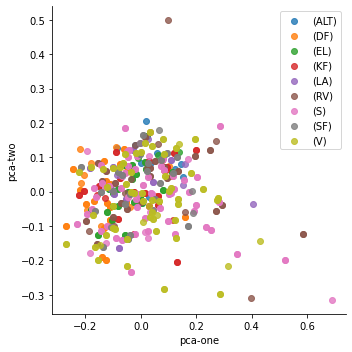

In [165]:
# library & dataset
import seaborn as sns
import matplotlib.pyplot as plt
 
# Use the 'hue' argument to provide a factor variable
sns.lmplot( x="pca-one", y="pca-two", data=X, fit_reg=False, hue='party', legend=False)
 
# Move the legend to an empty part of the plot
plt.legend(loc='upper right')

plt.show()

In [211]:
pca = X
pca = pca[["party", "pca-one", "pca-two"]]
pca_mean = pca.groupby("party").agg({"pca-one":['mean', 'std'], "pca-two": ['mean', 'std']}).reset_index()

pca_both = pca_mean
pca_both["pca-one-m"] = pca_mean['pca-one', 'mean']
pca_both["pca-one-std"] = pca_mean['pca-one', 'std']
pca_both["pca-two-m"] = pca_mean['pca-two', 'mean']
pca_both["pca-two-std"] = pca_mean['pca-two', 'std']
pca_both['std'] = (pca_both['pca-one-std'] + pca_both['pca-two-std'])*10
pca_both = pca_both[["pca-one-m", 'pca-two-m', 'std', 'party']].reset_index()
pca_both

,index,pca-one-m,pca-two-m,std,party
,,,,,
0,0,0.030924,0.076215,1.306288,(ALT)
1,1,-0.107624,-0.011210,1.861660,(DF)
2,2,-0.040966,0.008256,1.480200,(EL)
3,3,-0.000210,0.012657,1.985298,(KF)
4,4,-0.011546,0.033154,1.998672,(LA)
5,5,0.044355,0.021487,2.953518,(RV)
6,6,0.028180,-0.018739,2.540426,(S)
7,7,-0.007840,0.009685,1.966345,(SF)
8,8,0.018295,-0.017369,2.470585,(V)


[array(['(ALT)', '(DF)', '(EL)', '(KF)', '(LA)', '(RV)', '(S)', '(SF)',
       '(V)'], dtype=object)]


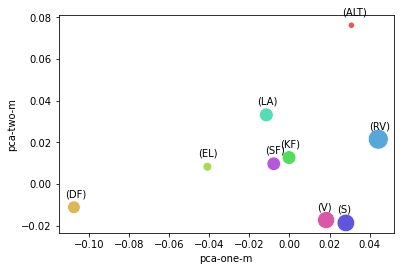

In [230]:
data = pca_both
labels = [data.party.unique()]
print(labels)
pal = sns.color_palette("hls",len(data['party'].unique()))

p1 = sns.scatterplot( x="pca-one-m", y="pca-two-m", data=data, hue='party', size = 'std', sizes=(40, 400), palette=pal, legend=False)
 
# Move the legend to an empty part of the plot
#plt.legend(loc='upper left')

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']-.0045, point['y']+0.005, str(point['val']))

label_point(data["pca-one-m"], data["pca-two-m"], data.party, plt.gca()) 

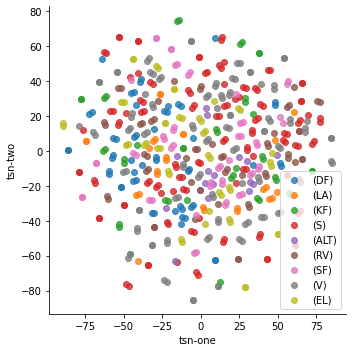

In [155]:
# library & dataset
import seaborn as sns
import matplotlib.pyplot as plt
 
# Use the 'hue' argument to provide a factor variable
sns.lmplot( x="tsn-one", y="tsn-two", data=X, fit_reg=False, hue='party', legend=False)
 
# Move the legend to an empty part of the plot
plt.legend(loc='lower right')

plt.show()

## Meeting Embeddings

### Loading Climate related Votes

In [245]:
df = pd.read_pickle("../../climate_classifier/scored_data/votes_data_all.pkl")
df_c = df[df["y_pred"]=="climate"].reset_index(drop=True)
df_c["year"] = df_c["date"].astype("str").str[:4]
df_c

,vote_id,description,votes,votes_by_party,vote_caller,url,description_text,date,y_pred,year
0,"Afstemning nr. 22, 2004-05 (1. samling)","[Sagsgang:, Fremsat 24-11-2004, 1. behandlet /...","{'party': ['Venstre (V)', 'Uden for folketings...","{'Absent': ['54', '52', '22', '16', '11', '9',...","[Skatteminister, Kristian Jensen (V)]",https://www.ft.dk//samling/20041/afstemning/22...,Baggrund:,2004-12-07,climate,2004
1,"Afstemning nr. 270, 2004-05 (1. samling)","[Sagsgang:, Fremsat 17-11-2004, 1. behandlet /...","{'party': ['Venstre (V)', 'Uden for folketings...","{'Absent': ['14', '18', '7', '9', '6', '5', '3...","[Skatteminister, Kristian Jensen (V)]",https://www.ft.dk//samling/20041/afstemning/27...,Loven indeholder følgende elementer: - CO2-afg...,2004-12-20,climate,2004
2,"Afstemning nr. 264, 2004-05 (1. samling)","[Sagsgang:, Fremsat 07-10-2004, 1. behandlet /...","{'party': ['Venstre (V)', 'Uden for folketings...","{'Absent': ['18', '17', '7', '9', '6', '5', '3...","[Skatteminister, Kristian Jensen (V)]",https://www.ft.dk//samling/20041/afstemning/26...,Loven indfører regler om den skattemæssige beh...,2004-12-20,climate,2004
3,"Afstemning nr. 100, 2004-05 (2. samling)","[Fremsat:, 17-05-2005, Forslag til vedtagelse:...","{'party': ['Det Konservative Folkeparti (KF)',...","{'Absent': ['17', '15', '7', '7', '8', '3', '4...","[Steen Gade (SF), Lars Christian Lilleholt (V)...",https://www.ft.dk//samling/20042/afstemning/10...,Folketinget ser det som vigtigt at koble løsni...,2005-05-17,climate,2005
4,"Afstemning nr. 132, 2004-05 (2. samling)","[Fremsat:, 26-05-2005, Forslag til vedtagelse:...","{'party': ['Det Konservative Folkeparti (KF)',...","{'Absent': ['22', '19', '10', '8', '9', '5', '...",[Per Clausen (EL)],https://www.ft.dk//samling/20042/afstemning/13...,"Folketinget ønsker, at udfordringerne på energ...",2005-05-26,climate,2005
...,...,...,...,...,...,...,...,...,...,...
382,"Afstemning nr. 136, 2021-22","[Sagsgang:, Fremsat 27-10-2021, 1. behandlet /...","{'party': ['Det Radikale Venstre (RV)', 'Siumu...","{'Absent': ['19', '16', '5', '7', '7', '6', '5...","[Klima-, energi- og forsyningsminister, Dan Jø...",https://www.ft.dk//samling/20211/afstemning/13...,Lovforslagets overordnede formål er at moderni...,2021-12-28,climate,2021
383,"Afstemning nr. 316, 2021-22","[Fremsat:, 03-03-2022, Forslag til vedtagelse:...","{'party': ['Siumut (SIU)', 'Dansk Folkeparti (...","{'Absent': ['18', '12', '6', '4', '5', '5', '4...",[Henning Hyllested (EL)],https://www.ft.dk//samling/20211/afstemning/31...,Regeringen opfordres til at ændre den danske l...,2022-03-03,climate,2022
384,"Afstemning nr. 318, 2021-22","[Fremsat:, 03-03-2022, Forslag til vedtagelse:...","{'party': ['Siumut (SIU)', 'Dansk Folkeparti (...","{'Absent': ['18', '12', '6', '4', '5', '5', '4...","[Carl Valentin (SF), Anders Kronborg (S), Kath...",https://www.ft.dk//samling/20211/afstemning/31...,Folketinget opfatter klimakrisen som en af tid...,2022-03-03,climate,2022
385,"Afstemning nr. 315, 2021-22","[Fremsat:, 03-03-2022, Forslag til vedtagelse:...","{'party': ['Siumut (SIU)', 'Dansk Folkeparti (...","{'Absent': ['18', '12', '6', '4', '6', '5', '4...",[Thomas Jensen (S)],https://www.ft.dk//samling/20211/afstemning/31...,"Folketinget konstaterer, at luftfarten har en ...",2022-03-03,climate,2022


In [247]:
df_vote_c = df_c
df_vote_c = df_vote_c[["vote_id", "description_text","year"]].reset_index(drop=True)
df_vote_c = df_vote_c[1:] ## Drop first "Baggrund (...)"
df_vote_c = df_vote_c[df_vote_c["year"].astype("int")>=2012]
df_vote_c

,vote_id,description_text,year
139,"Afstemning nr. 164, 2011-12",De danske ressourcer af olie og gas skal udnyt...,2012
140,"Afstemning nr. 150, 2011-12",Loven gennemfører en række initiativer som opf...,2012
141,"Afstemning nr. 206, 2011-12",Loven handler om samfundets beredskab over for...,2012
142,"Afstemning nr. 208, 2011-12",Loven udsætter en planlagt revision af lov om ...,2012
143,"Afstemning nr. 207, 2011-12",Loven indeholder en række ændringer som følge ...,2012
...,...,...,...
382,"Afstemning nr. 136, 2021-22",Lovforslagets overordnede formål er at moderni...,2021
383,"Afstemning nr. 316, 2021-22",Regeringen opfordres til at ændre den danske l...,2022
384,"Afstemning nr. 318, 2021-22",Folketinget opfatter klimakrisen som en af tid...,2022
385,"Afstemning nr. 315, 2021-22","Folketinget konstaterer, at luftfarten har en ...",2022


### Vectorize Text

In [248]:
## Remove stopwords and create lists containing words
df_vote_c['text_clean'] = df_vote_c['description_text'].apply(lambda x: word_tokenizer.tokenize(x))
df_vote_c.head(3)

,vote_id,description_text,year,text_clean
139,"Afstemning nr. 164, 2011-12",De danske ressourcer af olie og gas skal udnyt...,2012,"[dansk, ressource, olie, gas, udnytte, stor, m..."
140,"Afstemning nr. 150, 2011-12",Loven gennemfører en række initiativer som opf...,2012,"[lov, gennemføre, række, initiativ, opfølgning..."
141,"Afstemning nr. 206, 2011-12",Loven handler om samfundets beredskab over for...,2012,"[lov, handler, samfund, beredskab, oliekris, h..."


In [249]:
import numpy as np
vote_vect = np.array([np.array([model.wv[i] for i in ls if i in words])
                         for ls in df_vote_c["text_clean"]])
                         ## Takes 32 sec on Jonathan PC 2

C:\Users\COBOD\AppData\Local\Temp\ipykernel_2948\1180032204.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  vote_vect = np.array([np.array([model.wv[i] for i in ls if i in words])


In [250]:
vote_vec_avg = []
for v in vote_vect:
    if v.size:
        vote_vec_avg.append(v.mean(axis=0))
    else:
        vote_vec_avg.append(np.zeros(100, dtype=float))

        ## Takes 0.4 sec Jonathan PC 2

In [251]:
df_vote_c["vec"] = vote_vec_avg
df_vote_c.head(1)

,vote_id,description_text,year,text_clean,vec
139,"Afstemning nr. 164, 2011-12",De danske ressourcer af olie og gas skal udnyt...,2012,"[dansk, ressource, olie, gas, udnytte, stor, m...","[-0.09864144, 0.0328001, 0.053112306, -0.18728..."


### Cluster Votes embeddings (TSNE and PCA)

In [252]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
X = df_vote_c
X.head(1)

,vote_id,description_text,year,text_clean,vec
139,"Afstemning nr. 164, 2011-12",De danske ressourcer af olie og gas skal udnyt...,2012,"[dansk, ressource, olie, gas, udnytte, stor, m...","[-0.09864144, 0.0328001, 0.053112306, -0.18728..."


In [256]:
X = pd.DataFrame(df_vote_c.vec.tolist(), index= df_vote_c.index)
X["year"] = df_vote_c["year"].str.strip()
X.head(1)

,0,1,2,3,4,5,6,7,8,9,...,491,492,493,494,495,496,497,498,499,year
139,-0.098641,0.0328,0.053112,-0.187287,-0.065939,0.053231,-0.114348,0.008287,0.066815,-0.023844,...,0.098821,-0.01367,0.07069,-0.034119,-0.109221,0.009372,-0.028979,-0.002731,0.038899,2012


In [257]:
## PCA mood to comparison
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X.drop(columns=["year"]))

## TSNE
X_embedded = TSNE(n_components=2, learning_rate='auto', init='random').fit_transform(X.drop(columns=["year"]))

X['pca-one'] = pca_result[:,0]
X['pca-two'] = pca_result[:,1] 

X['tsn-one'] = X_embedded[:,0]
X['tsn-two'] = X_embedded[:,1] 

## y to digits
y = X[["year"]]
#print(y)
y["year"] = y["year"].astype('category')
y["year"] = y["year"].cat.codes
X['y'] = y["year"]
#print(y)
X = X.sort_values(by="year")
X

C:\Users\COBOD\AppData\Local\Temp\ipykernel_2948\28447703.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y["year"] = y["year"].astype('category')
C:\Users\COBOD\AppData\Local\Temp\ipykernel_2948\28447703.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y["year"] = y["year"].cat.codes


,0,1,2,3,4,5,6,7,8,9,...,496,497,498,499,year,pca-one,pca-two,tsn-one,tsn-two,y
139,-0.098641,0.032800,0.053112,-0.187287,-0.065939,0.053231,-0.114348,0.008287,0.066815,-0.023844,...,0.009372,-0.028979,-0.002731,0.038899,2012,0.438631,-0.115691,-9.413776,-4.085499,0
164,-0.055168,-0.002399,0.048279,-0.117150,-0.039054,0.013333,-0.060896,0.031378,0.085600,-0.011962,...,0.000101,-0.018802,-0.095381,0.047256,2012,-0.274310,0.023476,4.404852,6.413615,0
163,-0.058681,0.044027,-0.024200,-0.174254,-0.086719,0.028962,-0.057047,0.026312,0.090399,-0.053009,...,0.017593,-0.019736,-0.032535,0.056057,2012,0.042140,-0.275355,-2.135066,5.454496,0
162,-0.054736,0.029908,0.029744,-0.101861,-0.030745,0.056170,-0.102167,0.025733,0.087231,0.018534,...,0.013656,-0.014335,-0.094704,-0.003646,2012,-0.115431,-0.387761,1.091080,6.553716,0
161,-0.027122,-0.014494,0.065394,-0.093316,-0.009724,0.033054,-0.053242,0.048156,0.114236,-0.012953,...,0.000275,0.001869,-0.093415,0.054277,2012,-0.328636,0.351070,9.191665,5.970892,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,-0.005908,0.043837,0.008042,-0.120435,-0.027182,0.090220,-0.026283,0.029213,0.084450,-0.000151,...,0.018639,-0.029574,-0.118109,0.029398,2021,-0.205302,-0.342273,0.825313,0.219447,9
385,-0.156381,0.045796,0.058534,-0.164568,-0.085497,0.003947,-0.098128,0.030250,0.155524,-0.050096,...,0.021182,-0.052156,-0.013002,0.057317,2022,0.429710,0.139707,-7.678403,-6.747988,10
383,-0.128083,0.051634,0.077397,-0.113766,-0.068663,0.028590,-0.091632,0.027305,0.090826,-0.031675,...,0.028886,-0.045960,-0.071967,0.031299,2022,0.344916,-0.075991,-6.753597,-6.294484,10
384,-0.071933,-0.016704,0.081059,-0.122528,-0.047690,-0.008717,-0.080876,0.019836,0.102334,-0.054083,...,0.028554,-0.063213,0.040253,0.011498,2022,0.425928,-0.001437,-8.065928,-12.352954,10


No handles with labels found to put in legend.


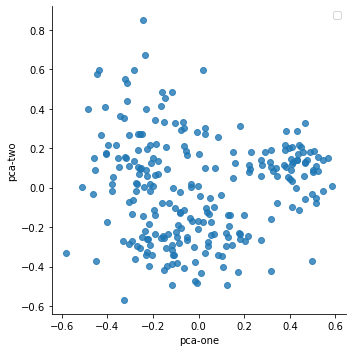

In [263]:
# library & dataset
import seaborn as sns
import matplotlib.pyplot as plt
 
# Use the 'hue' argument to provide a factor variable
sns.lmplot( x="pca-one", y="pca-two", data=X, fit_reg=False, legend=False)
 
# Move the legend to an empty part of the plot
plt.legend(loc='upper right')

plt.show()

### Clustering

#### K means

In [265]:
from sklearn.cluster import KMeans
xp = pd.DataFrame(data = X
             , columns = ['pca-one', 'pca-two'])

In [266]:
#Choosing the optimal number of clusters
from numpy import absolute

scores = []
clusters=[]

for cl in np.arange(1,10):
    kmeans = KMeans(cl)
    kmeans.fit(xp)
    
    scores.append(absolute(kmeans.score(xp)))
    clusters.append(cl)

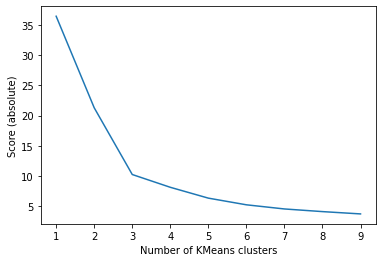

In [267]:
plt.plot(clusters, scores)
plt.xlabel('Number of KMeans clusters')
plt.ylabel('Score (absolute)')
plt.savefig("cross_val_km.pdf")

In [268]:
kmeans = KMeans(3)

In [269]:
identified_clusters = kmeans.fit_predict(xp)

In [272]:
df_clusters = X.copy()
df_clusters['Clusters'] = identified_clusters 
df_clusters

,0,1,2,3,4,5,6,7,8,9,...,497,498,499,year,pca-one,pca-two,tsn-one,tsn-two,y,Clusters
139,-0.098641,0.032800,0.053112,-0.187287,-0.065939,0.053231,-0.114348,0.008287,0.066815,-0.023844,...,-0.028979,-0.002731,0.038899,2012,0.438631,-0.115691,-9.413776,-4.085499,0,2
164,-0.055168,-0.002399,0.048279,-0.117150,-0.039054,0.013333,-0.060896,0.031378,0.085600,-0.011962,...,-0.018802,-0.095381,0.047256,2012,-0.274310,0.023476,4.404852,6.413615,0,0
163,-0.058681,0.044027,-0.024200,-0.174254,-0.086719,0.028962,-0.057047,0.026312,0.090399,-0.053009,...,-0.019736,-0.032535,0.056057,2012,0.042140,-0.275355,-2.135066,5.454496,0,1
162,-0.054736,0.029908,0.029744,-0.101861,-0.030745,0.056170,-0.102167,0.025733,0.087231,0.018534,...,-0.014335,-0.094704,-0.003646,2012,-0.115431,-0.387761,1.091080,6.553716,0,1
161,-0.027122,-0.014494,0.065394,-0.093316,-0.009724,0.033054,-0.053242,0.048156,0.114236,-0.012953,...,0.001869,-0.093415,0.054277,2012,-0.328636,0.351070,9.191665,5.970892,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,-0.005908,0.043837,0.008042,-0.120435,-0.027182,0.090220,-0.026283,0.029213,0.084450,-0.000151,...,-0.029574,-0.118109,0.029398,2021,-0.205302,-0.342273,0.825313,0.219447,9,1
385,-0.156381,0.045796,0.058534,-0.164568,-0.085497,0.003947,-0.098128,0.030250,0.155524,-0.050096,...,-0.052156,-0.013002,0.057317,2022,0.429710,0.139707,-7.678403,-6.747988,10,2
383,-0.128083,0.051634,0.077397,-0.113766,-0.068663,0.028590,-0.091632,0.027305,0.090826,-0.031675,...,-0.045960,-0.071967,0.031299,2022,0.344916,-0.075991,-6.753597,-6.294484,10,2
384,-0.071933,-0.016704,0.081059,-0.122528,-0.047690,-0.008717,-0.080876,0.019836,0.102334,-0.054083,...,-0.063213,0.040253,0.011498,2022,0.425928,-0.001437,-8.065928,-12.352954,10,2


[array([2, 0, 1])]


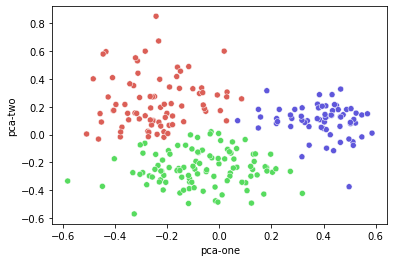

In [279]:
data = df_clusters
labels = [data.Clusters.unique()]
print(labels)
pal = sns.color_palette("hls",len(data['Clusters'].unique()))

p1 = sns.scatterplot( x="pca-one", y="pca-two", data=data, hue='Clusters', sizes=(40, 400), palette=pal, legend=False)
 
# Move the legend to an empty part of the plot
#plt.legend(loc='upper left') 

In [280]:
df_clusters.to_csv("vote_embeddings_clustered.csv")

#### Year

In [259]:
pca = X
pca = pca[["year", "pca-one", "pca-two"]]
pca_mean = pca.groupby("year").agg({"pca-one":['mean', 'std'], "pca-two": ['mean', 'std']}).reset_index()

pca_both = pca_mean
pca_both["pca-one-m"] = pca_mean['pca-one', 'mean']
pca_both["pca-one-std"] = pca_mean['pca-one', 'std']
pca_both["pca-two-m"] = pca_mean['pca-two', 'mean']
pca_both["pca-two-std"] = pca_mean['pca-two', 'std']
pca_both['std'] = (pca_both['pca-one-std'] + pca_both['pca-two-std'])*10
pca_both = pca_both[["pca-one-m", 'pca-two-m', 'std', 'year']].reset_index()
pca_both

,index,pca-one-m,pca-two-m,std,year
,,,,,
0,0,0.003249,-0.088254,4.846371,2012
1,1,-0.058006,-0.002276,5.112977,2013
2,2,-0.027291,0.088770,6.292664,2014
3,3,-0.006353,-0.084215,5.052599,2015
4,4,0.014510,-0.051267,5.322799,2016
5,5,-0.066083,0.040470,6.195196,2017
6,6,-0.108861,-0.001129,5.958680,2018
7,7,-0.006265,0.019554,6.103688,2019
8,8,0.061954,0.025017,5.241571,2020


[array(['2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019',
       '2020', '2021', '2022'], dtype=object)]


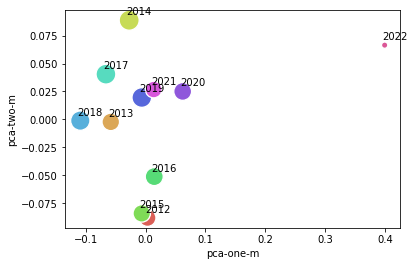

In [262]:
data = pca_both
labels = [data.year.unique()]
print(labels)
pal = sns.color_palette("hls",len(data['year'].unique()))

p1 = sns.scatterplot( x="pca-one-m", y="pca-two-m", data=data, hue='year', size = 'std', sizes=(40, 400), palette=pal, legend=False)
 
# Move the legend to an empty part of the plot
#plt.legend(loc='upper left')

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']-.0045, point['y']+0.005, str(point['val']))

label_point(data["pca-one-m"], data["pca-two-m"], data.year, plt.gca()) 